In [11]:
import os
import collections
import json
from PIL import Image
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tq
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
import glob
from keras.models import Sequential
from keras.layers import *
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tqdm import tqdm_notebook as tq
from random import shuffle
import os
from keras.utils.visualize_util import plot
from keras.optimizers import *
from shutil import copyfile
import random

%matplotlib inline
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
import os
from sklearn import cluster
from sklearn import neighbors
from scipy.misc import imread, imsave,imresize

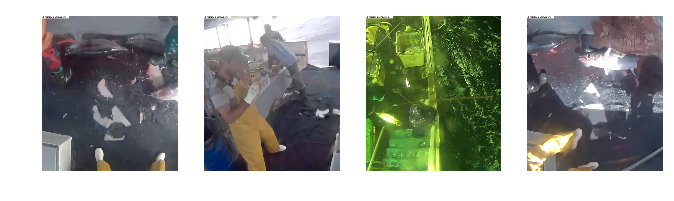

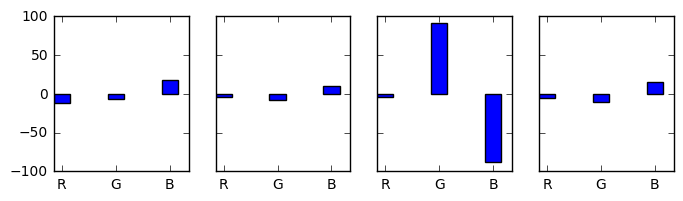

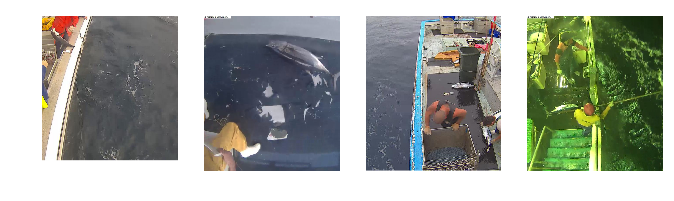

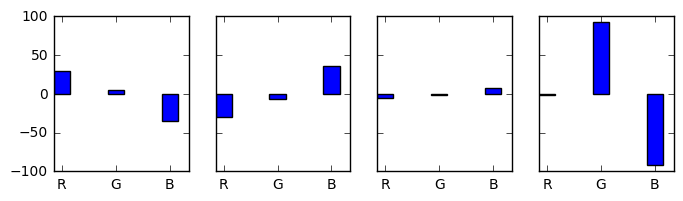

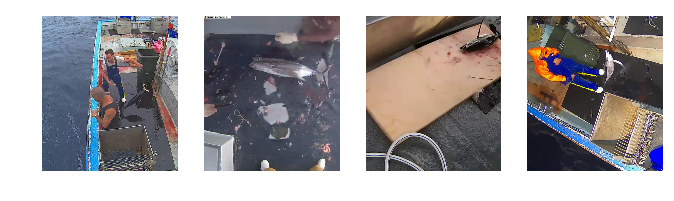

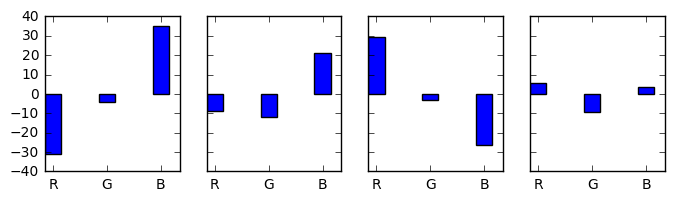

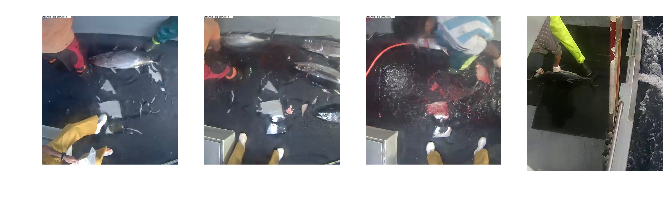

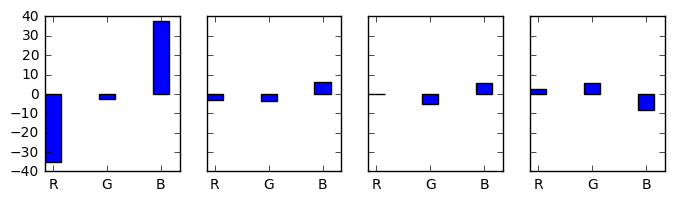

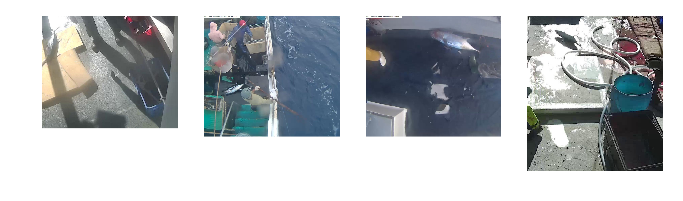

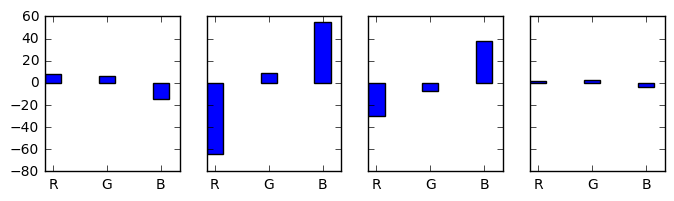

In [7]:
input_path  = './train/train/'
classes = [f for f in os.listdir(input_path) if f!='.DS_Store']
imgs_to_load = 20
for classe in classes:
    imgs = os.listdir(input_path+classe)
    imgs_path = [input_path+classe+'/'+img_name for img_name in imgs]
    preview_files = sorted(imgs_path, key=lambda x: random.random())[:imgs_to_load]
    preview = np.array([imread(img) for img in preview_files])
    def show_loaded_with_mean_differences(imgs):
        rows_total = int(len(preview) / 4)
        for i in range(rows_total):
            _, img_ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(8, 2))
            _, imgmean_ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(8, 2))
            for j in range(4):
                # calculate features of an image
                img = preview[i*4+j]
                img_mean = np.mean(img, axis=(0,1))
                img_features = np.zeros(3)
                img_features[0] = (img_mean[0] - img_mean[1]) + (img_mean[0] - img_mean[2])
                img_features[1] = (img_mean[1] - img_mean[0]) + (img_mean[1] - img_mean[2])
                img_features[2] = (img_mean[2] - img_mean[0]) + (img_mean[2] - img_mean[1])

                # display plots
                img_ax[j].axis('off')
                img_ax[j].imshow(img)
                imgmean_ax[j].bar(range(3), img_features, width=0.3, color='blue')
                imgmean_ax[j].set_xticks(np.arange(3) + 0.3 / 2)
                imgmean_ax[j].set_xticklabels(['R', 'G', 'B'])

    show_loaded_with_mean_differences(preview)
    plt.show()
    break

In [18]:
def generate_cluster_from_imgs(input_path,size=(200,200)):
    import collections 
    import os
    from sklearn import cluster
    from sklearn import neighbors
    from scipy.misc import imread, imsave,imresize
    import pickle
    import numpy as np
    from tqdm import tqdm_notebook as tq
    import random
    classes = [f for f in os.listdir(input_path) if f!='.DS_Store']
    L = np.array([len(os.listdir(input_path+classe)) for classe in classes]).sum()
    knn_cls = 2
    channel = 3
    #nbr_bins = 255
    data = collections.defaultdict(int)
    data_0 = collections.defaultdict(int)
    data_1 = collections.defaultdict(int)
    c = tq(total=L)
    for classe in classes:
        data[classe] = collections.defaultdict(int)
        data_0[classe] = []
        data_1[classe] = []
        imgs = os.listdir(input_path+classe)
        training_imgs = len(imgs)
        imgs_path = [input_path+classe+'/'+img_name for img_name in imgs]
        training_files = np.array(sorted(imgs_path, key=lambda x: random.random()))
        training = np.array([imresize(imread(img),size, interp='bilinear', mode=None)  for img in training_files])
        training_means = np.array([np.mean(img, axis=(0, 1)) for img in training])
        training_features = np.zeros((training_imgs, 3))
        for i in range(training_imgs):
            c.update()
            training_features[i][0] = (training_means[i][0] - training_means[i][1])
            training_features[i][0] += (training_means[i][0] - training_means[i][2])
            training_features[i][1] = (training_means[i][1] - training_means[i][0])
            training_features[i][1] += (training_means[i][1] - training_means[i][2])
            training_features[i][2] = (training_means[i][2] - training_means[i][0])
            training_features[i][2] += (training_means[i][2] - training_means[i][1])

        kmeans = cluster.KMeans(n_clusters=knn_cls).fit(training_features)
        cluster_0 = training_files[np.where(kmeans.labels_ == 0)]
        cluster_1 = training_files[np.where(kmeans.labels_ == 1)]
        for img_name in cluster_0:
            data[classe][img_name.split('/')[-1]]=0
            data_0[classe].append(img_name.split('/')[-1])
        for img_name in cluster_1:
            data[classe][img_name.split('/')[-1]]=0
            data_1[classe].append(img_name.split('/')[-1])
    pickle.dump( data, open( "data_clusters.p", "wb" ) )
    pickle.dump( data_0, open( "cluster_0.p", "wb" ) )
    pickle.dump( data_1, open( "cluster_1.p", "wb" ) )

In [19]:
generate_cluster_from_imgs('./train/train/',size=(100,100))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


3043/|/ 81%|| 3043/3777 [01:44<1:10:15,  5.74s/it]SAVED


In [23]:
def get_cluster_data(input_path):
    import pickle
    return pickle.load( open( input_path, "rb" ) )

In [24]:
print(get_cluster_data("cluster_0.p"))

defaultdict(<class 'int'>, {'SHARK': ['img_01182.jpg', 'img_03168.jpg', 'img_04535.jpg', 'img_06903.jpg', 'img_06474.jpg', 'img_02224.jpg', 'img_03712.jpg', 'img_00478.jpg', 'img_02469.jpg', 'img_02718.jpg', 'img_01161.jpg', 'img_00560.jpg', 'img_07841.jpg', 'img_01406.jpg', 'img_06686.jpg', 'img_01795.jpg', 'img_04854.jpg', 'img_00903.jpg', 'img_05126.jpg', 'img_04161.jpg', 'img_06013.jpg', 'img_05399.jpg', 'img_04819.jpg', 'img_06537.jpg', 'img_02348.jpg', 'img_05685.jpg', 'img_02478.jpg', 'img_03170.jpg', 'img_04857.jpg', 'img_06467.jpg', 'img_07860.jpg', 'img_04235.jpg', 'img_05257.jpg', 'img_03971.jpg', 'img_06493.jpg', 'img_03131.jpg', 'img_04618.jpg', 'img_03241.jpg', 'img_02087.jpg', 'img_07282.jpg', 'img_04245.jpg', 'img_01759.jpg', 'img_02088.jpg', 'img_01324.jpg', 'img_04110.jpg', 'img_05391.jpg', 'img_06956.jpg', 'img_01942.jpg', 'img_07392.jpg', 'img_03791.jpg', 'img_06595.jpg', 'img_07080.jpg', 'img_02732.jpg', 'img_00409.jpg', 'img_06913.jpg', 'img_05942.jpg', 'img_05504

In [3]:
def show_cluster_mean_hist(cluster_i):
    mean = 0
    mean_vector = np.zeros((len(cluster_i), 3))
    for i,img in enumerate(cluster_i):
        img_mean = np.array([np.mean(img[0,:]),np.mean(img[1,:]),np.mean(img[2,:])])
        mean_vector[i] = np.mean(img)
    mean = np.array([np.mean(mean_vector[0,:]),np.mean(mean_vector[1,:]),np.mean(mean_vector[2,:])])
    print(mean)
    plt.bar(range(3),mean , width=0.3, color='blue')
    plt.xticks(range(3),['R', 'G', 'B'])

In [4]:
def get_real_histogram_cluster(cluster_i):
    nbr_bins=255
    global_hist = np.zeros((len(cluster_i),3,nbr_bins))
    for n,img in enumerate(cluster_i):
        for d in range(channel):
            imhist,bins = np.histogram(img[:,:,d].flatten(),nbr_bins,normed=True)
            cdfsrc = imhist.cumsum() #cumulative distribution function
            cdfsrc = (255 * cdfsrc / cdfsrc[-1]).astype(np.uint8) #normalize
            global_hist[n][d] = cdfsrc
    hist_cluter = np.mean(global_hist,axis=(0))
    return hist_cluter
            #im2 = np.interp(imsrc[:,:,d].flatten(),bins[:-1],cdfsrc)
            #im3 = np.interp(im2,cdftint, bins[:-1])
            #imres[:,:,d] = im3.reshape((imsrc.shape[0],imsrc.shape[1] ))

In [5]:
normalised_train_path = './normalised/train/'
normalised_test_path = './normalised/test/'
train_path = './train/train/'
test_path = './test/test/'
cropped_images_test = './cropped_test/'
cropped_images_train = './cropped_train/'
#Create output dir
obj = [direc for direc in os.listdir('./train/train/') if direc!='.DS_Store']
print(obj)
for direc in obj:
    try:
        os.stat(normalised_train_path+direc)
    except:
        os.mkdir(normalised_train_path+direc)
for direc in obj:
    try:
        os.stat(normalised_test_path+direc)
    except:
        os.mkdir(normalised_test_path+direc)

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


In [12]:
def normalize_img(hist_cluster,img):
    imsrc = img
    imres = img.copy()
    for d in range(channel):
        imhist,bins = np.histogram(imsrc[:,:,d].flatten(),nbr_bins,normed=True)
        cdfsrc = imhist.cumsum() #cumulative distribution function
        cdfsrc = (255 * cdfsrc / cdfsrc[-1]).astype(np.uint8) #normalize
        cdftint = hist_cluster[d]
        im2 = np.interp(imsrc[:,:,d].flatten(),bins[:-1],cdfsrc)
        im3 = np.interp(im2,cdftint, bins[:-1])
        imres[:,:,d] = im3.reshape((imsrc.shape[0],imsrc.shape[1] ))
    return imres
    #    _, img_ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 2))
    #for j in range(2):
    #    if j == 0:
    #        img_ax[j].axis('off')
    #        img_ax[j].imshow(img)
    #    else:
    #        img_ax[j].axis('off')
    #        img_ax[j].imshow(imres)                

In [45]:
def normalise_cluster_save(clusters,hist_cluter,output_folder):
    print(output_folder)
    for i,cluster in enumerate(clusters):
        if i == 1:
            for j,img in enumerate(tq(cluster)):
                output_name = output_folder+str(i)+'_'+str(j)+'.jpeg'
                img_normalised = normalize_img(hist_cluter,img)
                img_out = Image.fromarray(np.uint8(img_normalised))
                img_out.save(output_name, "JPEG", quality=100, optimize=True, progressive=True) 
        else:
            for j,img in enumerate(tq(cluster)):
                output_name = output_folder+str(i)+'_'+str(j)+'.jpeg'
                img_out = Image.fromarray(np.uint8(img))
                img_out.save(output_name, "JPEG", quality=100, optimize=True, progressive=True)             